# Medical Image Analysis for Knee Osteoathritis

## Importing Dependencies

In [36]:
import cv2,os
from pathlib import Path 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils

## Defining data paths and categories

In [37]:

data_path='/Users/harshchaudhary/Downloads/Minor Data'
categories=['Grade 4', 'Grade 3', 'Grade 2', 'Normal', 'Grade 1']
labels=[0, 1, 2, 3, 4]
label_dict={'Grade 4': 4, 
            'Grade 3': 3, 
            'Grade 2': 2,  
            'Grade 1': 1,
            'Normal': 0
    
}


## Data Pre-processing

In [38]:
img_size=256
data=[]
label=[]
for category in categories:
    folder_path=os.path.join(data_path,category)#Obtaining the folder path
    img_names=os.listdir(folder_path)#List of all image names
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            if(img is not None):
                gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                resized=cv2.resize(gray,(img_size, img_size))
                data.append(resized)
                label.append(label_dict[category])
            #appending the image and the categorized labels into the dataset
        except Exception as e:
            print('Exception:',e)
            #if any exception is rasied then exception will be printed here.


In [39]:
data[0].shape

(256, 256)

In [40]:
data

[array([[90, 92, 95, ..., 52, 50, 49],
        [92, 94, 95, ..., 51, 50, 49],
        [93, 94, 96, ..., 51, 50, 50],
        ...,
        [13, 13, 12, ..., 59, 58, 57],
        [12, 12, 12, ..., 60, 59, 57],
        [13, 11, 12, ..., 60, 59, 57]], dtype=uint8),
 array([[ 0,  0,  0, ..., 38, 36, 34],
        [ 0,  0,  0, ..., 37, 35, 33],
        [ 0,  0,  0, ..., 37, 35, 33],
        ...,
        [79, 84, 88, ...,  0,  0,  0],
        [80, 84, 87, ...,  0,  0,  0],
        [82, 84, 87, ...,  0,  0,  0]], dtype=uint8),
 array([[135, 134, 131, ...,  30,  26,  23],
        [135, 133, 130, ...,  31,  28,  25],
        [134, 132, 130, ...,  32,  28,  25],
        ...,
        [ 48,  49,  50, ..., 131, 131, 129],
        [ 49,  51,  50, ..., 130, 129, 127],
        [ 50,  52,  52, ..., 129, 129, 127]], dtype=uint8),
 array([[151, 153, 155, ..., 143, 144, 145],
        [152, 154, 155, ..., 147, 145, 146],
        [152, 154, 154, ..., 147, 144, 145],
        ...,
        [125, 123, 121, ..., 1

In [41]:
data=np.array(data)/255.0 #Normalizing the data to more comfortable value

In [42]:
data

array([[[0.35294118, 0.36078431, 0.37254902, ..., 0.20392157,
         0.19607843, 0.19215686],
        [0.36078431, 0.36862745, 0.37254902, ..., 0.2       ,
         0.19607843, 0.19215686],
        [0.36470588, 0.36862745, 0.37647059, ..., 0.2       ,
         0.19607843, 0.19607843],
        ...,
        [0.05098039, 0.05098039, 0.04705882, ..., 0.23137255,
         0.22745098, 0.22352941],
        [0.04705882, 0.04705882, 0.04705882, ..., 0.23529412,
         0.23137255, 0.22352941],
        [0.05098039, 0.04313725, 0.04705882, ..., 0.23529412,
         0.23137255, 0.22352941]],

       [[0.        , 0.        , 0.        , ..., 0.14901961,
         0.14117647, 0.13333333],
        [0.        , 0.        , 0.        , ..., 0.14509804,
         0.1372549 , 0.12941176],
        [0.        , 0.        , 0.        , ..., 0.14509804,
         0.1372549 , 0.12941176],
        ...,
        [0.30980392, 0.32941176, 0.34509804, ..., 0.        ,
         0.        , 0.        ],
        [0.3

In [43]:
print(label)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

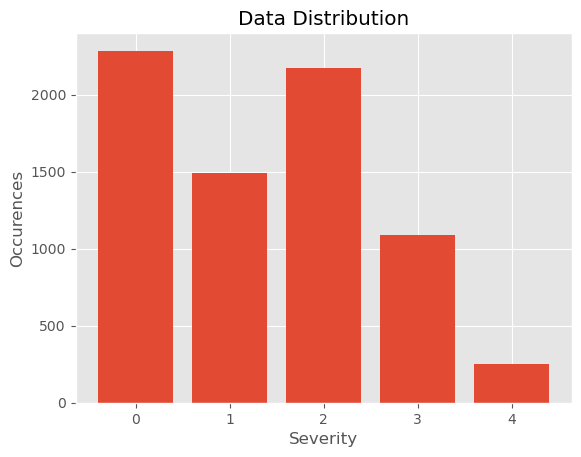

<Figure size 640x480 with 0 Axes>

In [115]:
unique, counts = np.unique(label, return_counts=True)

plt.bar(unique, counts)

plt.xlabel('Severity')
plt.ylabel('Occurences')
plt.title('Data Distribution')

plt.show()
plt.savefig('datadist.png', dpi=300, bbox_inches='tight')

In [44]:
len(label)


7293

In [45]:
len(data)

7293

In [46]:
data.shape[0]

7293

In [47]:
data=np.reshape(data,(data.shape[0],img_size,img_size,-1))#Converting the 'data' list into a numpy array
label=np.array(label)

In [48]:
data.shape[0]

7293

In [49]:
new_label=np_utils.to_categorical(label) #Converting the numpy array into categorical values for classificaton

In [50]:
data.shape[1:]


(256, 256, 1)

In [51]:
data

array([[[[0.35294118],
         [0.36078431],
         [0.37254902],
         ...,
         [0.20392157],
         [0.19607843],
         [0.19215686]],

        [[0.36078431],
         [0.36862745],
         [0.37254902],
         ...,
         [0.2       ],
         [0.19607843],
         [0.19215686]],

        [[0.36470588],
         [0.36862745],
         [0.37647059],
         ...,
         [0.2       ],
         [0.19607843],
         [0.19607843]],

        ...,

        [[0.05098039],
         [0.05098039],
         [0.04705882],
         ...,
         [0.23137255],
         [0.22745098],
         [0.22352941]],

        [[0.04705882],
         [0.04705882],
         [0.04705882],
         ...,
         [0.23529412],
         [0.23137255],
         [0.22352941]],

        [[0.05098039],
         [0.04313725],
         [0.04705882],
         ...,
         [0.23529412],
         [0.23137255],
         [0.22352941]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [52]:
print(new_label.shape[1:])
print(new_label)

(5,)
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


## Defining the shape of the model

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization


In [190]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model

import tensorflow as tf

# Define the input shape of the images
input_shape = (256, 256, 1)

model = tf.keras.Sequential([
    # First convolutional layer with batch normalization
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    # Second convolutional layer with batch normalization
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    # Third convolutional layer with batch normalization
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    
     tf.keras.layers.Flatten(),
#Flatten layer to stack the output convolutions from 3rd convolution layer

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16,activation='relu'),
#Dense layer of 64 neurons

    tf.keras.layers.Dense(units=5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])






In [191]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 254, 254, 64)      640       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_38 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_55 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                     

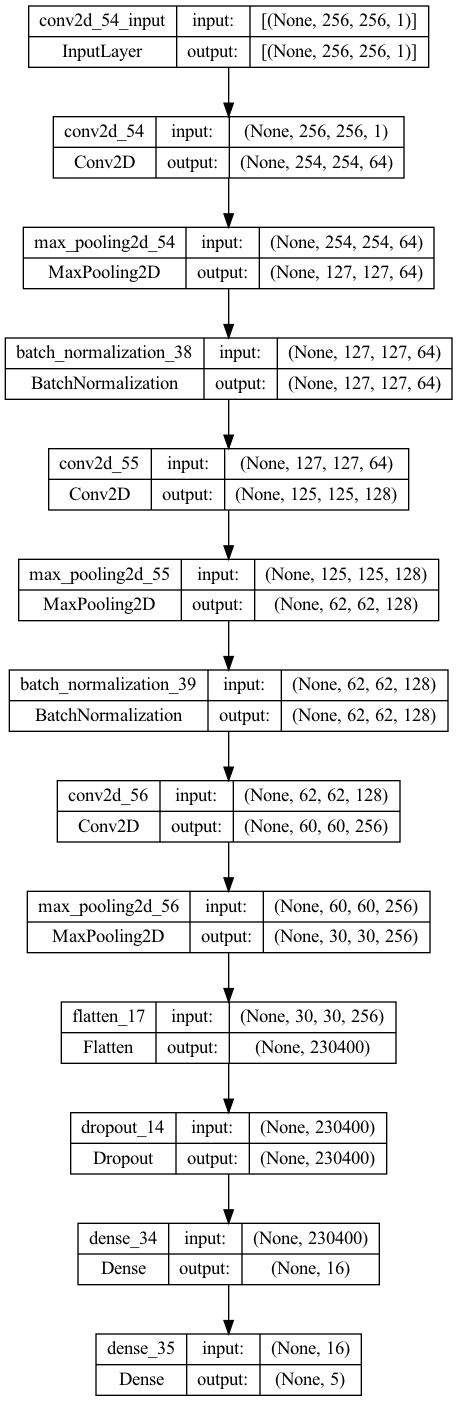

In [193]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1,random_state=42, shuffle=True)

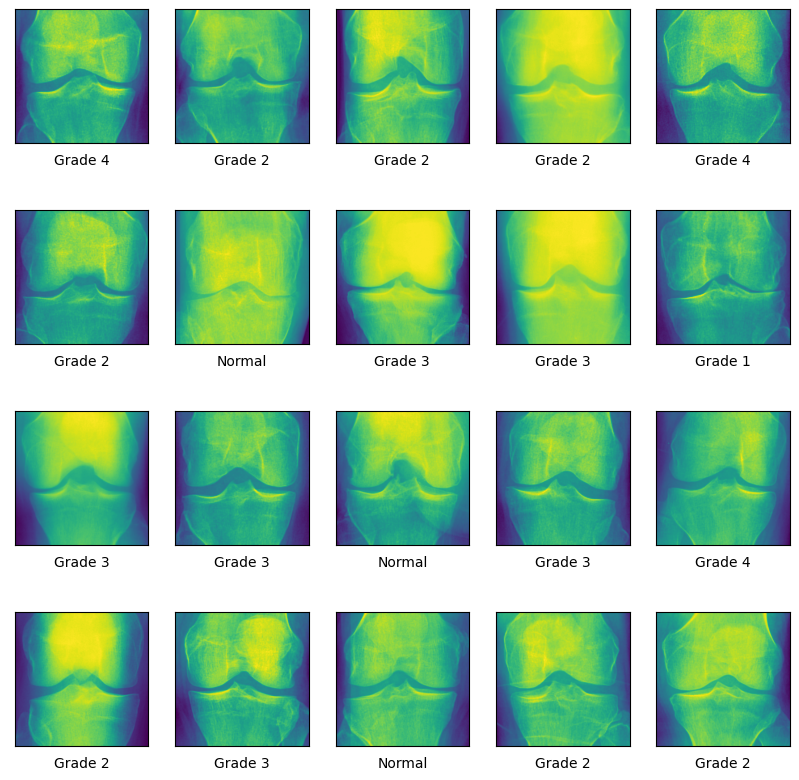

In [13]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    #Turn off ticks 
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

## Fitting the model

In [55]:
import tensorflow as tf

In [130]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=4)

In [131]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, 
                    validation_split=0.1,callbacks=[early_stop])

Epoch 1/10


2023-04-21 04:49:05.597288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


185/185 [==============================] - ETA: 0s - loss: 0.4056 - accuracy: 0.8635

2023-04-21 04:51:32.822426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


185/185 [==============================] - 153s 817ms/step - loss: 0.4056 - accuracy: 0.8635 - val_loss: 0.7277 - val_accuracy: 0.7656
Epoch 2/10
185/185 [==============================] - 159s 860ms/step - loss: 0.3660 - accuracy: 0.8750 - val_loss: 0.7993 - val_accuracy: 0.7458
Epoch 3/10
185/185 [==============================] - 166s 895ms/step - loss: 0.3490 - accuracy: 0.8759 - val_loss: 0.7644 - val_accuracy: 0.7732
Epoch 4/10
185/185 [==============================] - 171s 922ms/step - loss: 0.3034 - accuracy: 0.8965 - val_loss: 0.6516 - val_accuracy: 0.8052
Epoch 5/10
185/185 [==============================] - 195s 1s/step - loss: 0.3001 - accuracy: 0.8937 - val_loss: 0.7672 - val_accuracy: 0.7747
Epoch 6/10
185/185 [==============================] - 192s 1s/step - loss: 0.2753 - accuracy: 0.9025 - val_loss: 0.7832 - val_accuracy: 0.7808
Epoch 7/10
185/185 [==============================] - 196s 1s/step - loss: 0.2744 - accuracy: 0.8969 - val_loss: 0.8491 - val_accuracy: 0.779

In [133]:
model.save('model78.h5')


In [134]:
model = tf.keras.models.load_model('model76.h5')

## Model Training Plot

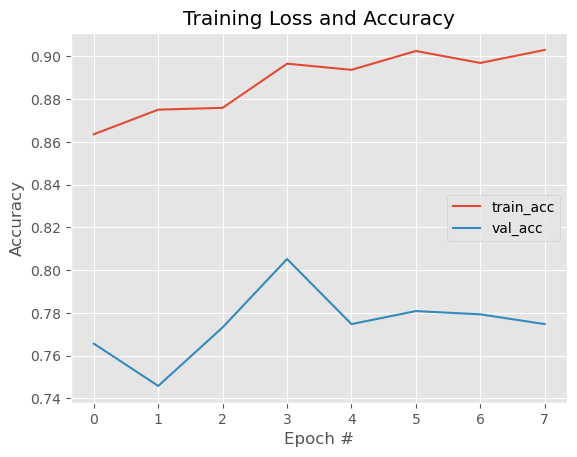

In [136]:

# plot the training loss and accuracy

N = 8 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

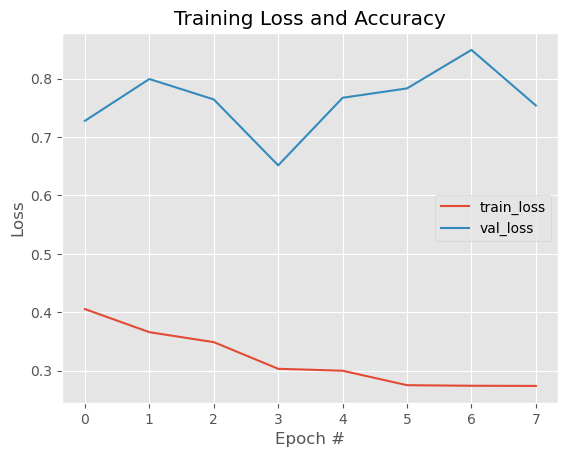

In [138]:
N = 8 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="center right")
plt.savefig("CNN_Model2")

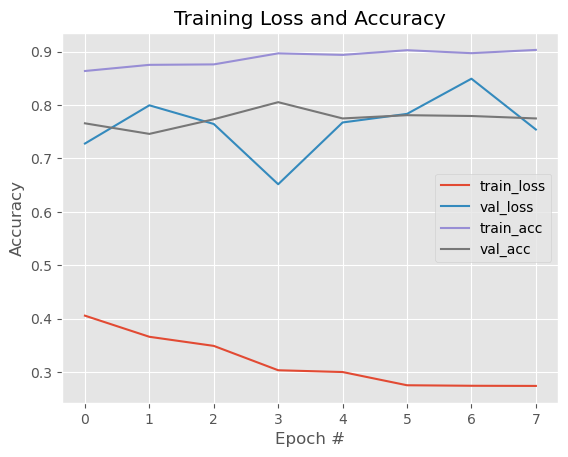

In [146]:

# plot the training loss and accuracy

N = 8 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [139]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")


2023-04-21 05:18:44.061735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


test loss: 0.8529988527297974 %
test accuracy: 0.7643835544586182 %


## Building a predictive system

1/1 [==============================] - 0s 139ms/step
A.I predicts: Grade 2
Correct prediction is Grade 2


2023-04-21 05:19:31.046348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


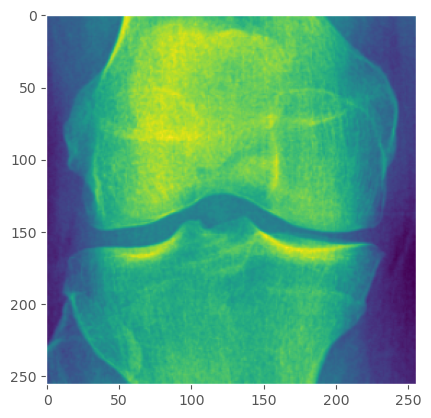

In [140]:
X = 89
img_size = 256
img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)
predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction is",categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

In [141]:
from mlxtend.plotting import plot_confusion_matrix

23/23 [==============================] - 5s 236ms/step


<Figure size 640x480 with 0 Axes>

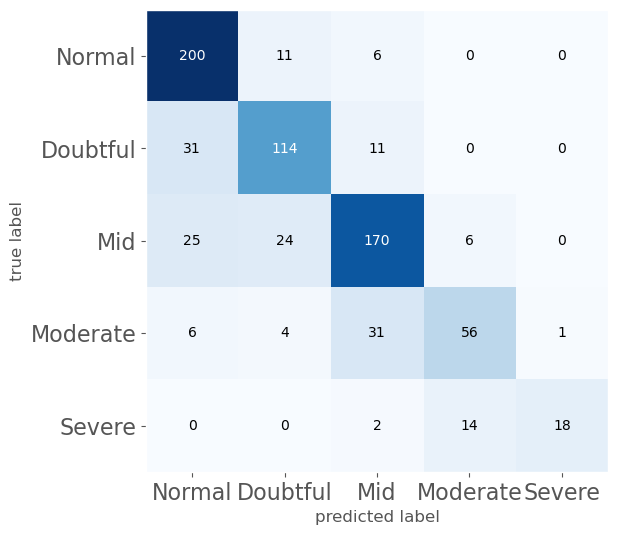

In [142]:

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)
cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(10,6), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()


In [149]:
plt.savefig('plotfinal.png')

<Figure size 640x480 with 0 Axes>

In [144]:
    from sklearn.metrics import classification_report
    y_predict = model.predict(x_test)
    y_predict.shape
    

23/23 [==============================] - 5s 229ms/step


(730, 5)

In [145]:
print(classification_report(test_labels, predictions, target_names=categories))

              precision    recall  f1-score   support

     Grade 4       0.76      0.92      0.84       217
     Grade 3       0.75      0.73      0.74       156
     Grade 2       0.77      0.76      0.76       225
      Normal       0.74      0.57      0.64        98
     Grade 1       0.95      0.53      0.68        34

    accuracy                           0.76       730
   macro avg       0.79      0.70      0.73       730
weighted avg       0.77      0.76      0.76       730

